In [1]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle, analysis as ana
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [2]:
from matplotlib import rc
rc('text', usetex=True)

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)

chi: -4.5 , chi (sim mean): 0.0 , chi (sim std): 3.7 , PTE: 0.22 
chi^2: 16.7 , chi^2 (sim): 11.2 , PTE: 0.18 
chi: -0.4 , chi (sim mean): 0.0 , chi (sim std): 3.8 , PTE: 0.88 
chi^2: 24.6 , chi^2 (sim): 11.2 , PTE: 0.02 
chi: -7.0 , chi (sim mean): 0.0 , chi (sim std): 3.6 , PTE: 0.08 
chi^2: 19.5 , chi^2 (sim): 11.2 , PTE: 0.09 


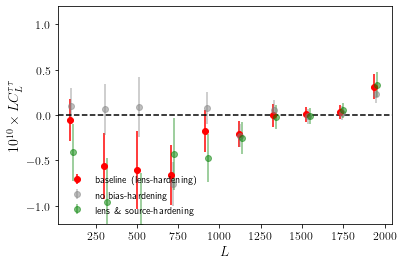

In [10]:
pl.plot_1dstyle(ymin=-1.2,ymax=1.2,ylab=r'$10^{10}\times LC_L^{\tau\tau}$',usetex=True,yticks=[-1.,-.5,0.,.5,1.],yticks_labsize=12,xticks_labsize=12)
#s = 1e10*mb.bc
s = 1e5*mb.bc
for i, (bh, Lab, co, alpha) in enumerate([(['lens'],r'baseline (lens-hardening)','r',1.),(None,r'no bias-hardening','grey',.5),(['lens','src'],r'lens \& source-hardening','g',.5)]):
    mcb, vcb, scb, ocb = tools_qrec.load_binned_tt(mb,bhe=bh)
    errorbar(mb.bc+i*10-10,s*ocb,yerr=s*vcb,fmt='o',color=co,alpha=alpha,label=Lab)
    st = ana.PTEs(ocb,scb-mcb,x1pte=True)
axhline(0.,color='k',ls='--')
legend(loc=3)
show()